In [1]:
from tcsim.system import*
from tcsim.visualization import*
from tcsim.gates import*

from scipy import optimize
import numpy as np
import qutip as qt

81.0


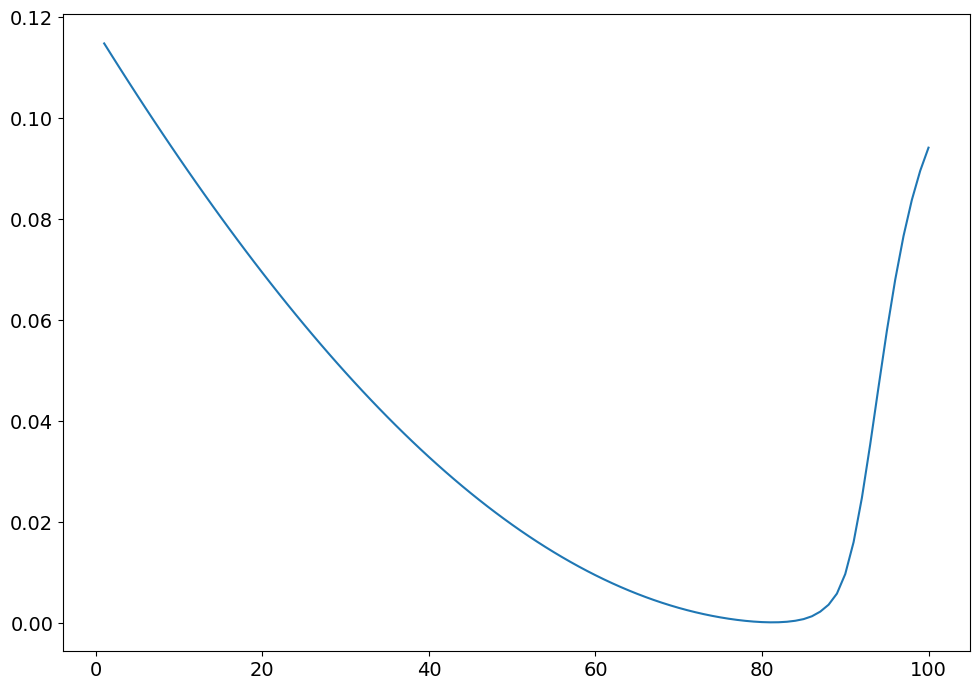

In [2]:
t_displace = np.linspace(0,0.12,10)
t_wait = np.linspace(0,0.08,10)

def overlapWithIdeal(epsilon):
    ideal  = CD_ideal_operator(1j)*vac
    exp = Rx(np.pi)*ECD_exp(vac, t_displace, t_wait, 1, epsilon = epsilon)
    overlap = exp.overlap(ideal)
    
    return 1-abs(overlap)

eps = np.linspace(1,100,100)

overlaps = []
for i in eps:
    overlaps.append(overlapWithIdeal(i))
plt.plot(eps,overlaps)
print(eps[np.argmin(overlaps)])
epsilon = eps[np.argmin(overlaps)]

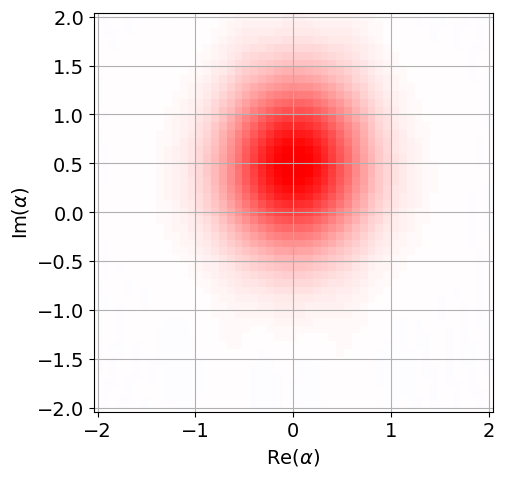

In [3]:
loss = calc_loss(1000, 1000, 20, 14)
state = ECD_exp(vac, t_displace, t_wait, 1 , epsilon, loss = loss)
plot_wigner(state)

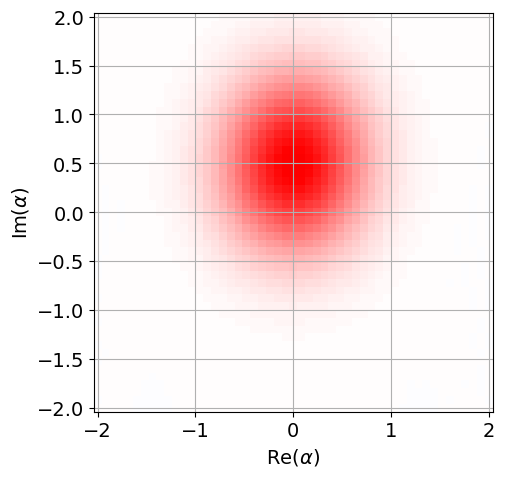

In [4]:
plot_wigner(state)

In [4]:
psi1 = U(vac, t_displace, t_wait, 1, epsilon=epsilon, loss = loss)
psi2 = V(psi1, t_displace, t_wait, -0.6, epsilon=epsilon, loss = loss)

In [8]:
plot_char_exp(psi2, t_displace, t_wait,  epsilon=epsilon)
plot_char_exp(psi2,  t_displace, t_wait,epsilon=epsilon,real=False)

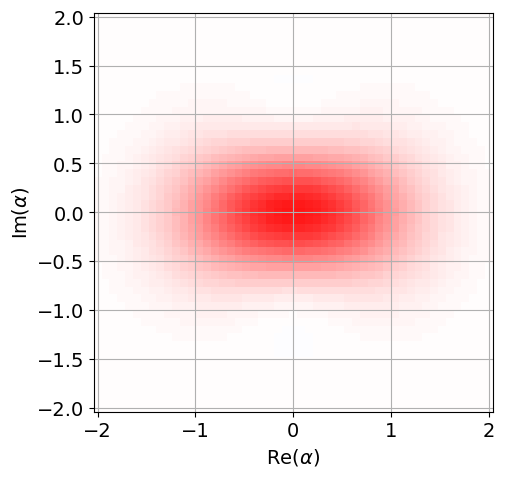

In [10]:
plot_wigner(psi2)

In [11]:
u_1 = -0.84571552
v_1 =  0.61335235 
u_2 = 2.63648988 
v_2 = 0.30560449 
u_3 = -0.91694799 
v_3 = -0.80353261



psi1 = U(vac, t_displace, t_wait, u_1, epsilon = epsilon, loss = loss)
psi2 = V(psi1, t_displace, t_wait, v_1, epsilon = epsilon, loss = loss)
psi3 = U(psi2, t_displace, t_wait, u_2, epsilon = epsilon, loss = loss)
psi4 = V(psi3, t_displace, t_wait, v_2, epsilon = epsilon, loss = loss)
psi5 = U(psi4, t_displace, t_wait, u_3, epsilon = epsilon, loss = loss)
psi6 = V(psi5, t_displace, t_wait, v_3, epsilon = epsilon, loss = loss)